# Exploratory Data Analysis: Discrete Variables

### Intro and objectives:

#### review methods to explore the distribution of discrete data

### In this lab you will learn:
1.  How to visualize distributions of discrete data


## 0. Let's import required libraries and load some data


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [57]:
happinessReport = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/Maths4DS101/main/data/world-happiness-report.csv',parse_dates=['year'])

In [58]:
happinessReport.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [59]:
happinessReport.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [60]:
# Let's select 4 countries

countryFilter=['Mexico','Sweden','China','Afghanistan']

In [61]:
happinessReportFiltered=happinessReport[happinessReport['Country name'].isin(countryFilter)]

In [62]:
happinessReportFiltered

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013-01-01,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014-01-01,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015-01-01,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016-01-01,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017-01-01,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


### 1. Frequency Tables
#### A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment

#### A simple alternative to compute frequency tables is via Pandas value_count() method


In [63]:
happinessReportFiltered['Country name'].value_counts()

China          15
Mexico         15
Sweden         15
Afghanistan    12
Name: Country name, dtype: int64

In [64]:
happinessReportFiltered['year'].value_counts()

2008-01-01    4
2009-01-01    4
2010-01-01    4
2011-01-01    4
2012-01-01    4
2013-01-01    4
2014-01-01    4
2015-01-01    4
2016-01-01    4
2017-01-01    4
2018-01-01    4
2019-01-01    4
2007-01-01    3
2020-01-01    3
2005-01-01    2
2006-01-01    1
Name: year, dtype: int64

### 2. BarCharts
#### BarCharts are a natural visualization for discrete data. They are usually not very informative

#### There are several alternatives to compute histograms in Python:

#### 1. Using Pandas
#### 2. Using seaborn

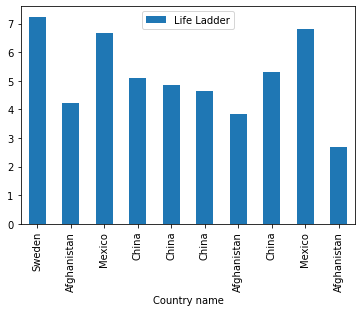

In [65]:


happinessReportFiltered.sample(10).plot.bar(x='Country name',y='Life Ladder')

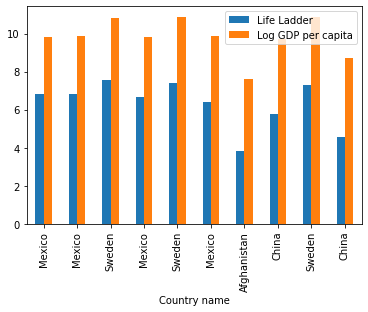

In [66]:
happinessReportFiltered.sample(10).plot.bar(x='Country name',y=['Life Ladder','Log GDP per capita'])

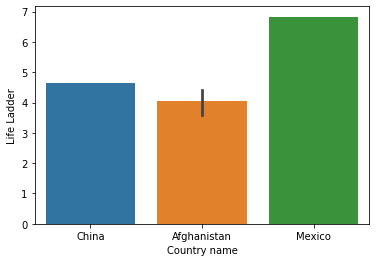

In [67]:
sns.barplot(data=happinessReportFiltered.sample(5), x="Country name", y="Life Ladder")

### 4. Box Plots
#### Box Plots are quite useful to summarize visually the distribution of a variable


#### We recommend using seaborn

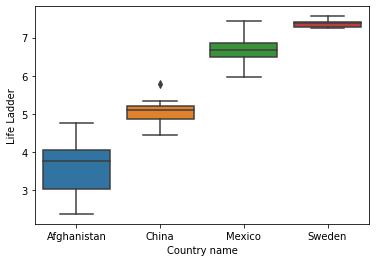

In [68]:

sns.boxplot(data=happinessReportFiltered, x="Country name", y="Life Ladder")

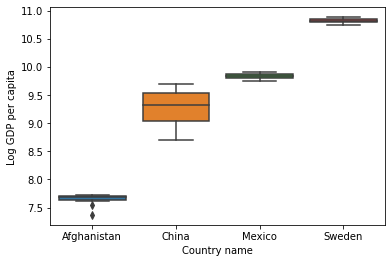

In [69]:
sns.boxplot(data=happinessReportFiltered, x="Country name", y="Log GDP per capita")

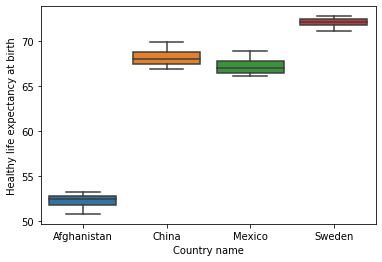

In [70]:


sns.boxplot(data=happinessReportFiltered, x="Country name", y="Healthy life expectancy at birth")

### 4. Violin Plots
#### Violin Plots are also quite useful to summarize visually the distribution of a variable. They are more informative that boxplots.


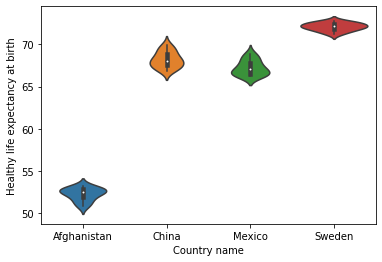

In [71]:
sns.violinplot(data=happinessReportFiltered,x='Country name', y="Healthy life expectancy at birth")

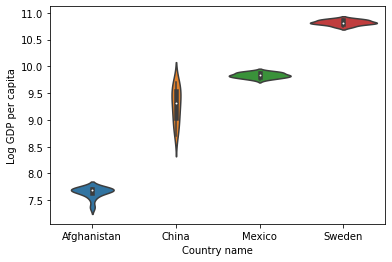

In [72]:


sns.violinplot(data=happinessReportFiltered,x='Country name', y="Log GDP per capita")